In [42]:
import sys, os  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D  
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
from keras.regularizers import l2  
from keras.utils import np_utils 

In [21]:
df=pd.read_csv('/content/drive/MyDrive/Data Kaggle/Emotion Detection/fer2013.csv')  
X_train,train_y,X_test,test_y=[],[],[],[]  
for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    try:  
        if 'Training' in row['Usage']:  
           X_train.append(np.array(val,'float32'))  
           train_y.append(row['emotion'])  
        elif 'PublicTest' in row['Usage']:  
           X_test.append(np.array(val,'float32'))  
           test_y.append(row['emotion'])  
    except:  
        print(f"error occured at index :{index} and row:{row}") 

In [23]:
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 20  
width, height = 48, 48  

X_train = np.array(X_train,'float32')  
train_y = np.array(train_y,'float32')  
X_test = np.array(X_test,'float32')  
test_y = np.array(test_y,'float32')  

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)   
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)  

X_train -= np.mean(X_train, axis=0) #normalize dữ liệu giữa 0 và 1 
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)  

In [24]:
print(X_train.shape)
print(train_y.shape)
print(X_test.shape)
print(test_y.shape)

(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)


In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [29]:
X_train.shape[1:]

(48, 48, 1)

In [36]:
model = Sequential()  

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))  
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.2))  

#2nd convolution layer  
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.2))  

#3rd convolution layer  
model.add(Conv2D(256, (3, 3), activation='relu'))  
model.add(Conv2D(256, (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  

model.add(Flatten())  

#fully connected neural networks  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  

model.add(Dense(num_labels, activation='softmax'))  

# model.summary()  

#Compliling the model  
model.compile(loss=categorical_crossentropy,  
              optimizer=Adam(),  
              metrics=['accuracy']) 

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 128)        

In [40]:
#Training the model  
history = model.fit_generator(datagen.flow(X_train, train_y, batch_size=batch_size),  
          epochs=30,  
          verbose=1,  
          validation_data=(X_test, test_y),  
          shuffle=True)  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
449/449 [==============================] - 24s 53ms/step - loss: 0.9569 - accuracy: 0.6414 - val_loss: 1.0755 - val_accuracy: 0.6002
Epoch 2/30
449/449 [==============================] - 23s 52ms/step - loss: 0.9484 - accuracy: 0.6429 - val_loss: 1.0738 - val_accuracy: 0.6091
Epoch 3/30
449/449 [==============================] - 23s 52ms/step - loss: 0.9465 - accuracy: 0.6448 - val_loss: 1.0567 - val_accuracy: 0.6160
Epoch 4/30
449/449 [==============================] - 24s 52ms/step - loss: 0.9416 - accuracy: 0.6463 - val_loss: 1.0494 - val_accuracy: 0.6194
Epoch 5/30
449/449 [==============================] - 23s 52ms/step - loss: 0.9340 - accuracy: 0.6532 - val_loss: 1.0595 - val_accuracy: 0.6135
Epoch 6/30
449/449 [==============================] - 23s 52ms/step - loss: 0.9226 - accuracy: 0.6546 - val_loss: 1.0916 - val_accuracy: 0.6030
Epoch 7/30
449/449 [==============================] - 24s 52ms/step - loss: 0.9218 - accuracy: 0.6545 - val_loss: 1.1037 - val_accuracy:

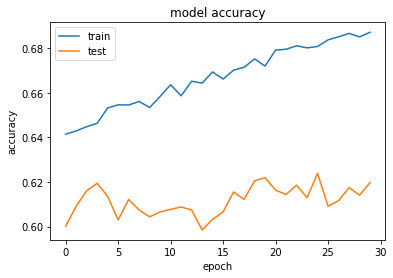

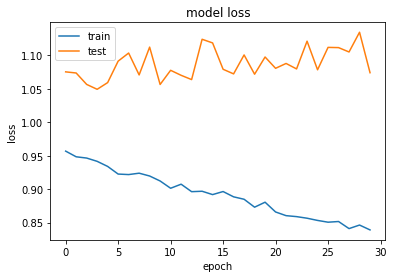

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#Saving the  model 
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5")  